# Data analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [2]:
%run Mappings.ipynb
%run Helpers.ipynb
# %run /content/drive/MyDrive/DentistDataAnalysis/Experiments/Mappings.ipynb
# %run /content/drive/MyDrive/DentistDataAnalysis/Experiments/Helpers.ipynb

In [3]:
# DIR = '/content/drive/MyDrive/DentistDataAnalysis/Experiments/'
# IMG_DIR = '/content/drive/MyDrive/DentistDataAnalysis/Experiments/images/'
# FIG_DIR = '/content/drive/MyDrive/DentistDataAnalysis/Experiments/figures/'
DIR = ''
IMG_DIR = 'images/'
FIG_DIR = 'figures/'
all_cols = ['Que1', 'Que2', 'Que3', 'Que4', 'Que5', 'Que6', 'Que10_a', 'Que10_b', 'Que10_c', 'Que10_d', 'Que10_e', 'Que10_f', 'Que14', 'Que15', 'Que16', 'Que17', 'Que18_age', 'Que19', 'Que20', 'Que21', 'Que22', 'Que_smoking']
without_target_cols = ['Que1', 'Que2', 'Que3', 'Que4', 'Que5', 'Que6', 'Que10_a', 'Que10_b', 'Que10_c', 'Que10_d', 'Que10_e', 'Que10_f', 'Que14', 'Que15', 'Que17', 'Que18_age', 'Que19', 'Que20', 'Que21', 'Que22', 'Que_smoking']
numeric_cols = ['Que18_age']

## Loading data

In [4]:
source_data = pd.read_excel(DIR+'dataset/TusekI_DataSet_Pregnangcy.xlsx', usecols=source_columns_SR, engine='openpyxl')
source_data.columns = source_columns_EN

## Data wrangling

Any impossible answer is marked as missing.

In [5]:
for index, row in source_data.iterrows():
    for col in source_data.columns:
        if col=='Que1' or col=='Que14' or col=='Que15' or col=='Que22':
            if row[col]<=0 or row[col]>5:
                row[col] = np.nan
        elif col=='Que2' or col=='Que4' or col=='Que6' or col=='Que16':
            if row[col]<=0 or row[col]>6:
                row[col] = np.nan
        elif col=='Que3' or col=='Que5' or col=='Que10_a' or col=='Que10_b' or col=='Que10_c' or col=='Que10_d' or col=='Que10_e' or col=='Que10_f' or col=='Que19' or col=='Que20' or col=='Que21':
            if row[col]<=0 or row[col]>4:
                row[col] = np.nan
        elif col=='Que11' or col=='Que12' or col=='Que13' or col=='Que17':
            if row[col]<=0 or row[col]>3:
                row[col] = np.nan
        elif col=='Que18_age':
            if row[col]<15 or row[col]>50:
                row[col] = np.nan

### Smoking

Only one column is enough for smoking. If the pregnant woman smoked in any trimester then she is marked as smoker.

In [6]:
source_data['Que_smoking'] = np.nan

In [7]:
#1 - yes
#2 - no
for index, row in source_data.iterrows():
    if row['Que11']==3 and row['Que12']==3 and row['Que13']==3:
        row['Que_smoking']=2
    elif row['Que11']==1 or row['Que11']==2 or row['Que12']==1 or row['Que12']==2 or row['Que13']==1 or row['Que13']==2:
        row['Que_smoking']=1
    else:
        row['Que_smoking']=np.nan
source_data = source_data.drop(['Que11', 'Que12', 'Que13'], axis=1)

## Getting data subset

For this research we don't need all provided columns. After getting subset we save this data for further use, this data is marked as final for use in this research.

Column that we need: 'Que1', 'Que2', 'Que3', 'Que4', 'Que5', 'Que6', 'Que10_a', 'Que10_b', 'Que10_c', 'Que10_d', 'Que10_e', 'Que10_f', 'Que14', 'Que15', 'Que16', 'Que17', 'Que18_age', 'Que19', 'Que20', 'Que21', 'Que22', 'Que_smoking'.

In [8]:
out_data = source_data[all_cols]
out_data.to_csv(DIR+'dataset/final_data.csv', index=False)

## Simple statistics

In [9]:
print(out_data.describe())

              Que1         Que2         Que3         Que4         Que5  \
count  3940.000000  3891.000000  3778.000000  2927.000000  3762.000000   
mean      3.039594     3.245695     2.751191     4.016057     2.293993   
std       1.213220     1.510470     0.823940     0.967384     1.161837   
min       1.000000     1.000000     1.000000     1.000000     1.000000   
25%       2.000000     2.000000     2.000000     4.000000     1.000000   
50%       2.000000     3.000000     3.000000     4.000000     2.000000   
75%       4.000000     5.000000     3.000000     4.000000     3.000000   
max       5.000000     6.000000     4.000000     6.000000     4.000000   

              Que6      Que10_a      Que10_b      Que10_c      Que10_d  ...  \
count  2462.000000  3874.000000  3783.000000  3708.000000  3678.000000  ...   
mean      2.625914     1.320599     1.719535     2.777238     2.271887  ...   
std       1.853258     0.566701     0.645823     0.627144     0.666236  ...   
min       1.00000

In [10]:
out_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4310 entries, 0 to 4309
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Que1         3940 non-null   float64
 1   Que2         3891 non-null   float64
 2   Que3         3778 non-null   float64
 3   Que4         2927 non-null   float64
 4   Que5         3762 non-null   float64
 5   Que6         2462 non-null   float64
 6   Que10_a      3874 non-null   float64
 7   Que10_b      3783 non-null   float64
 8   Que10_c      3708 non-null   float64
 9   Que10_d      3678 non-null   float64
 10  Que10_e      3821 non-null   float64
 11  Que10_f      3776 non-null   float64
 12  Que14        3776 non-null   float64
 13  Que15        3717 non-null   float64
 14  Que16        3845 non-null   float64
 15  Que17        3649 non-null   float64
 16  Que18_age    3852 non-null   float64
 17  Que19        3839 non-null   float64
 18  Que20        3695 non-null   float64
 19  Que21 

## Plotting

Barplot for all non numerical columns except target column (Que16) and histplot for numerical columns.

/home/miroslav/anaconda3/envs/master-env/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


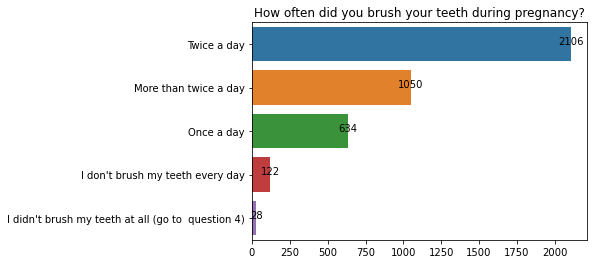

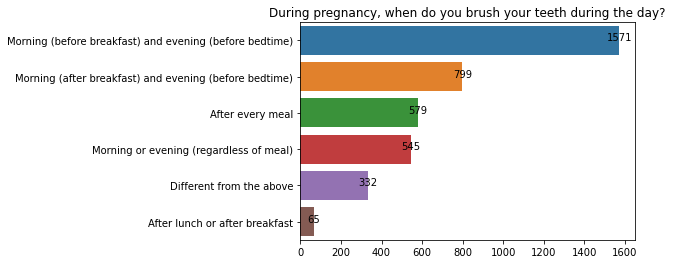

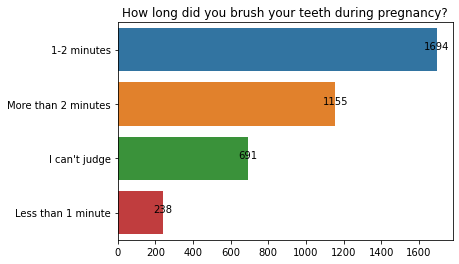

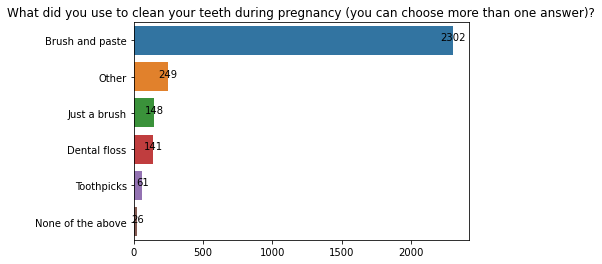

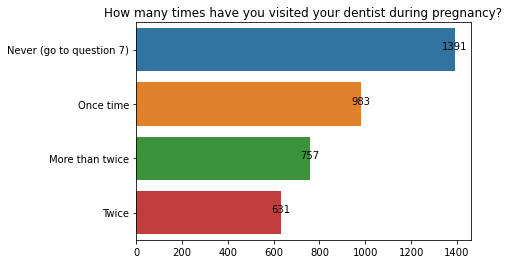

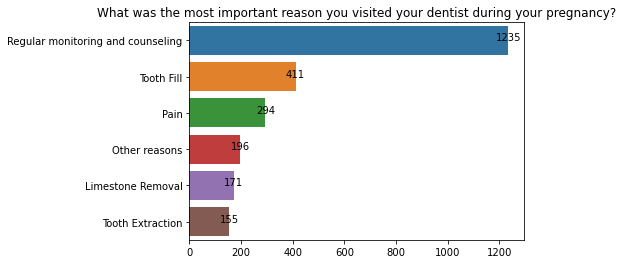

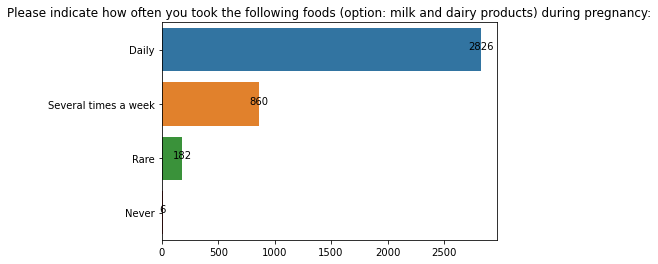

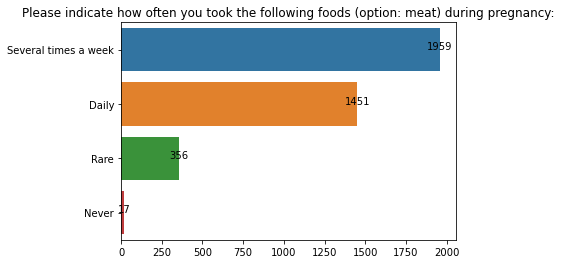

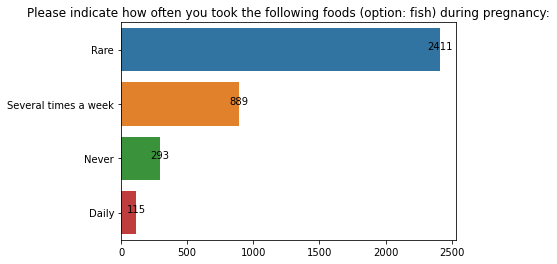

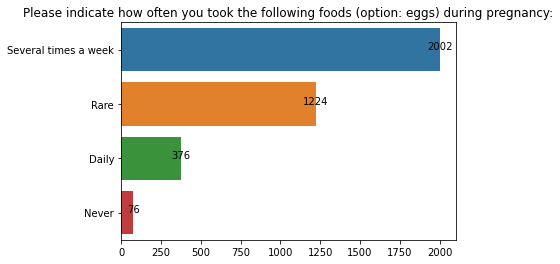

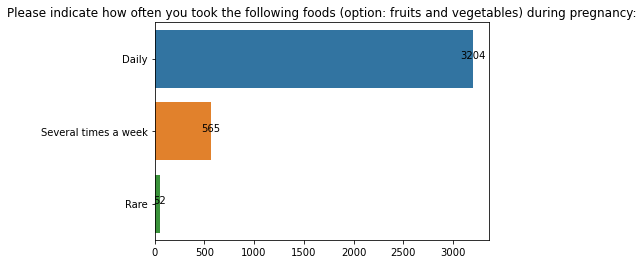

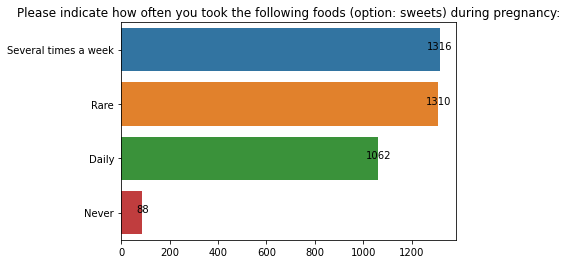

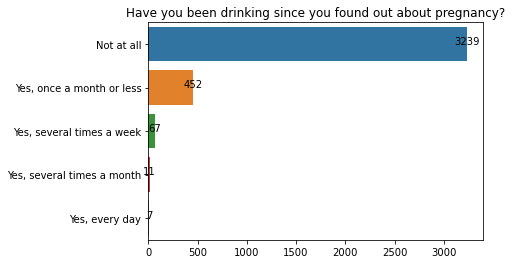

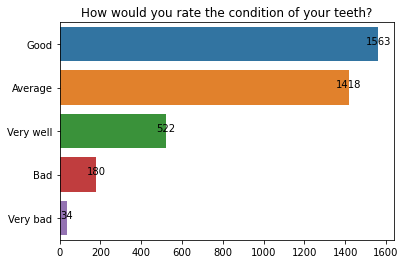

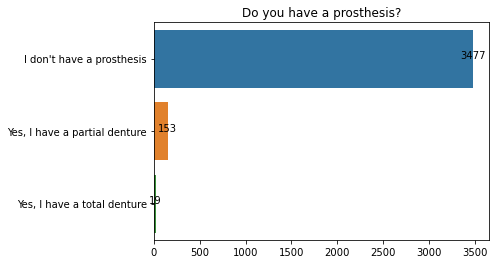

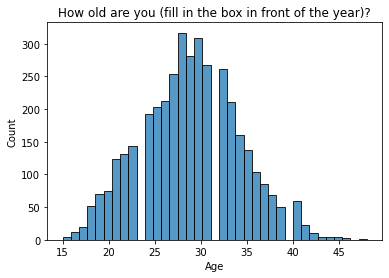

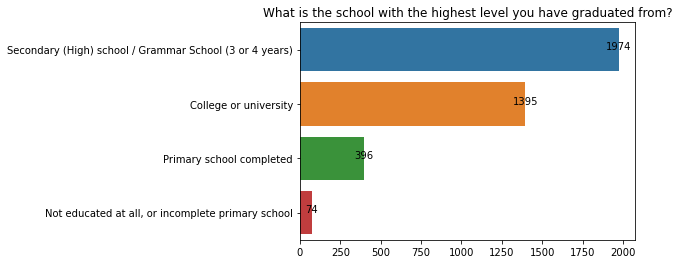

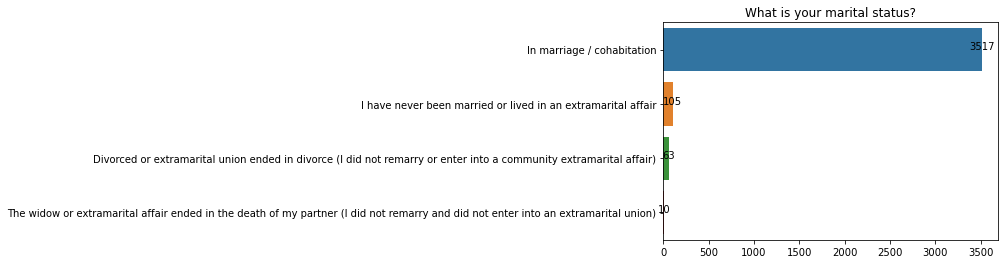

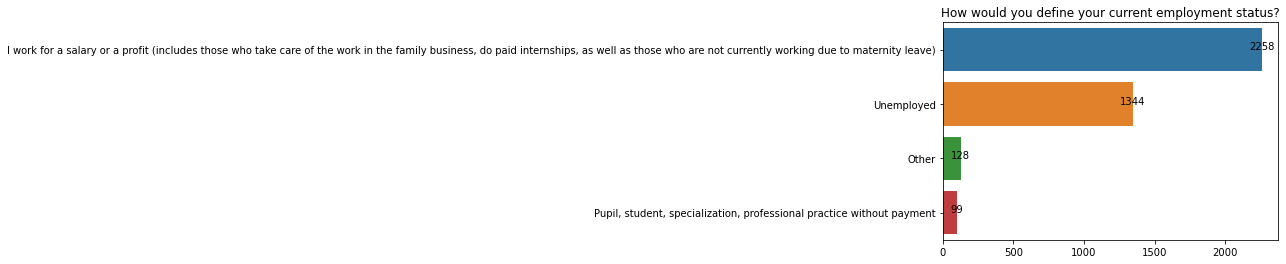

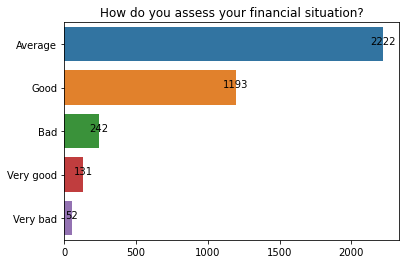

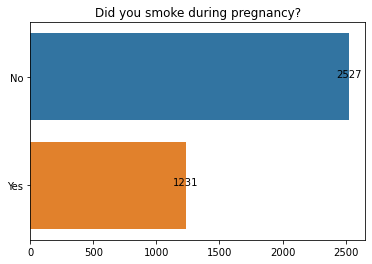

In [11]:
data = out_data.copy()
for col in data.columns:
    if col=='Que16':
        continue
    title = questions_EN[col]['text'] 
    barplot(col, data, title, numeric_cols, questions_EN)

Barplot for target column.

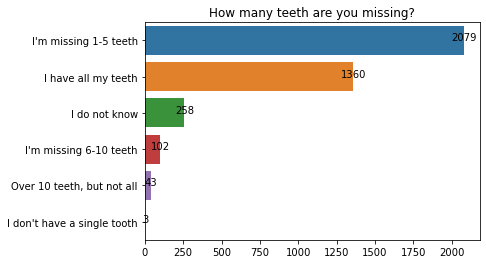

In [12]:
title = questions_EN['Que16']['text'] 
barplot('Que16', data[['Que16']], title, numeric_cols, questions_EN)

Mapping answers from target column (Que16) in two classes (0 - good habbits, 1 - bad habbits) for further plotting.

In [13]:
data = out_data.copy()
target_col = 'Que16'
target = pd.DataFrame(data[target_col])
target_data = perform_mapping(target, questions_map_EN)
data['Que16'] = target_data

Plotting differences in occurrences for two classes (missing and not missing teeths) for each question.

/home/miroslav/anaconda3/envs/master-env/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


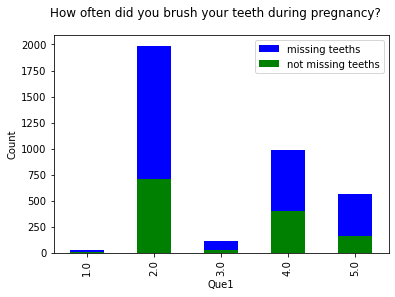

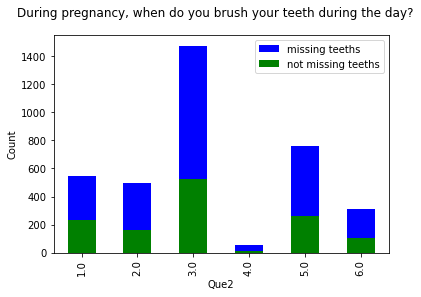

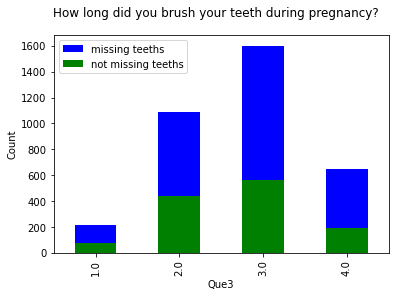

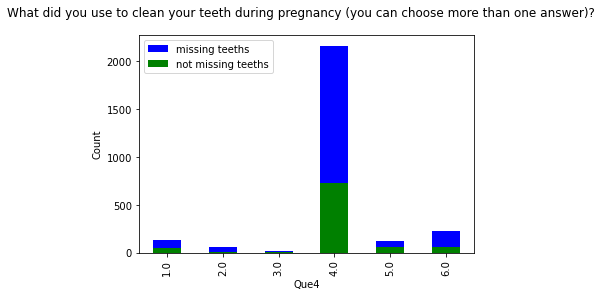

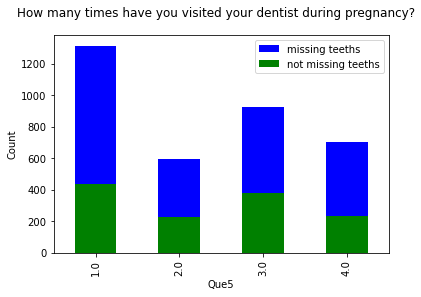

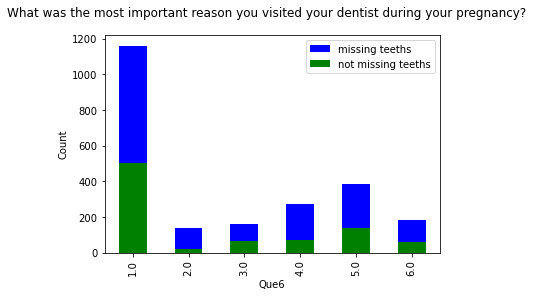

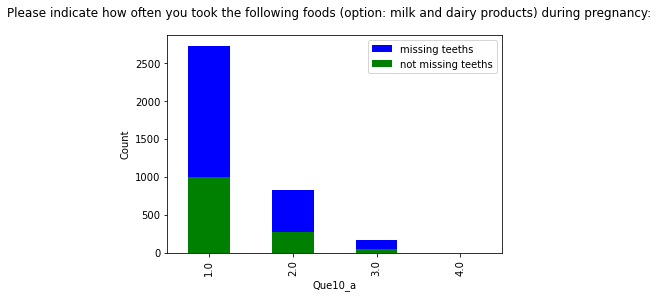

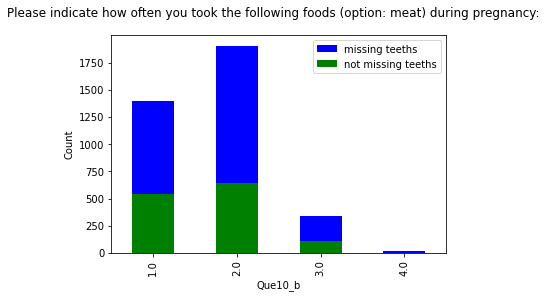

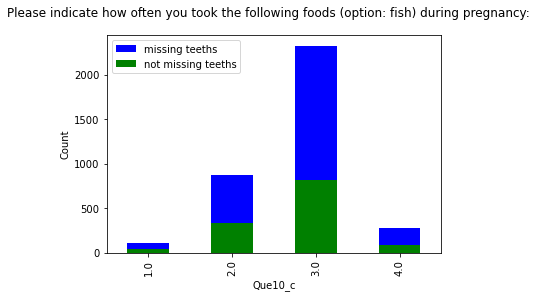

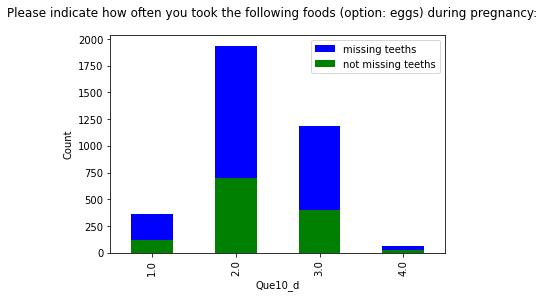

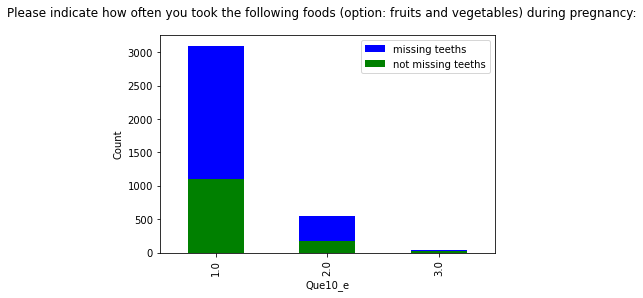

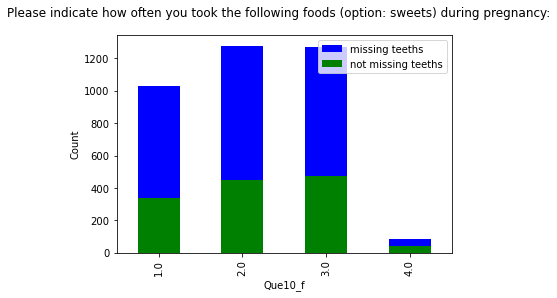

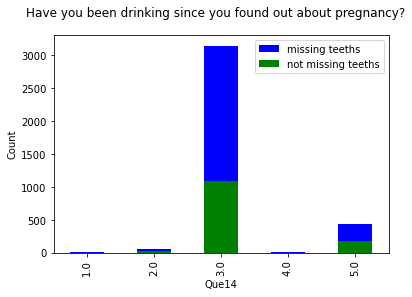

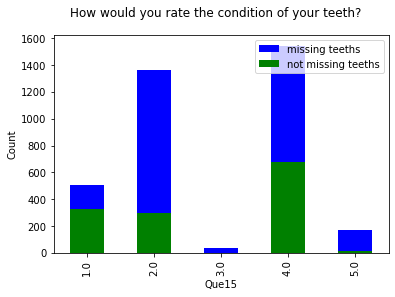

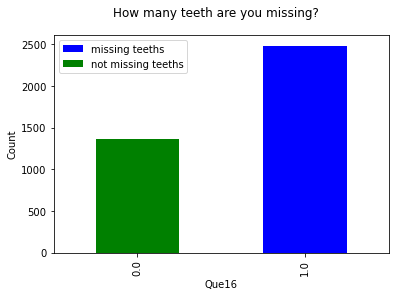

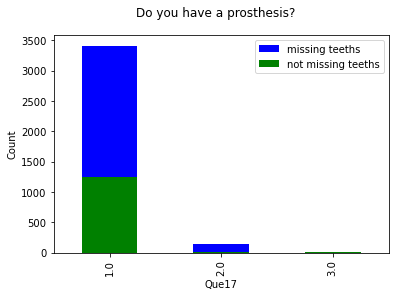

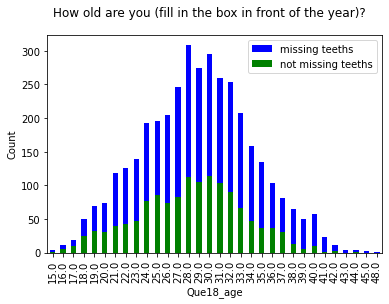

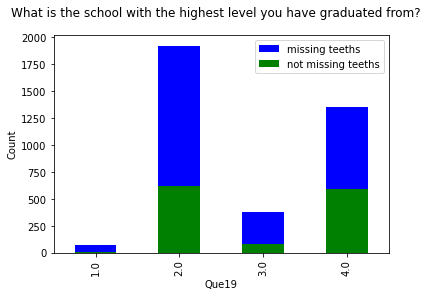

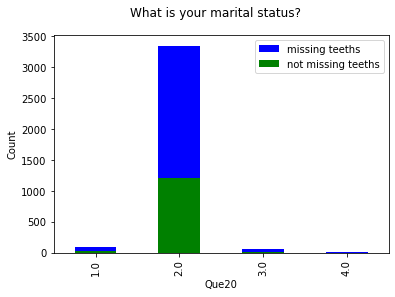

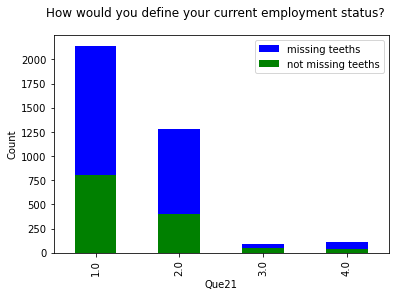

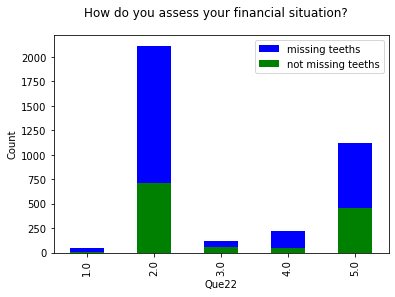

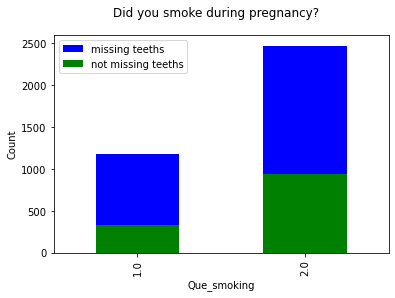

In [14]:
for col in data.columns:
    counts_df = data.groupby([col, "Que16"])[col].count().unstack()
    fig, ax = plt.subplots()

    counts_df.plot(kind="bar", stacked=True, color=["green", "blue"], ax=ax)
    ax.set_xlabel(col)
    ax.set_ylabel("Count")

    color_patches = [
        Patch(facecolor="blue", label="missing teeths"),
        Patch(facecolor="green", label="not missing teeths")
    ]
    ax.legend(handles=color_patches)
    
    title = questions_EN[col]['text'] 
    fig.suptitle(title);
    fig.savefig(FIG_DIR+col+'_countplot.png', dpi=fig.dpi)

Plotting countplot for two classes (missing and not missing teeths) for each question to see proportion ratio of classes.

/home/miroslav/anaconda3/envs/master-env/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


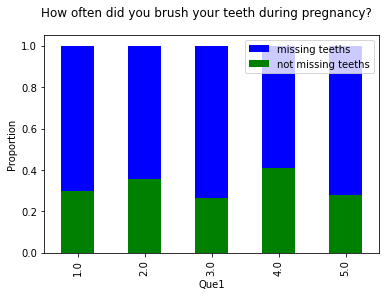

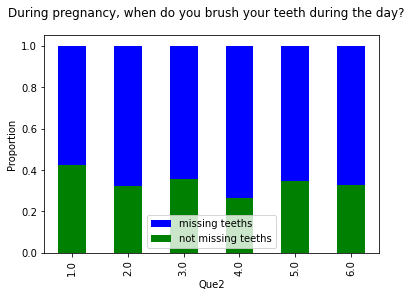

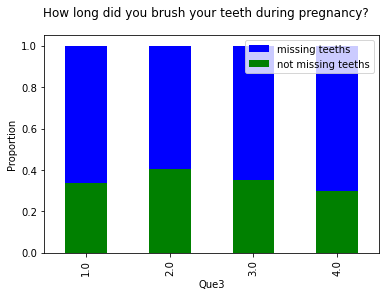

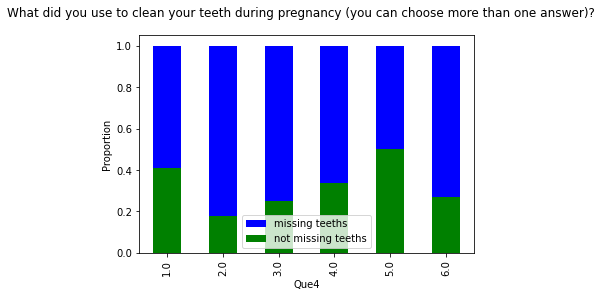

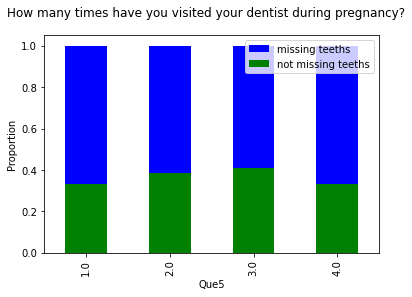

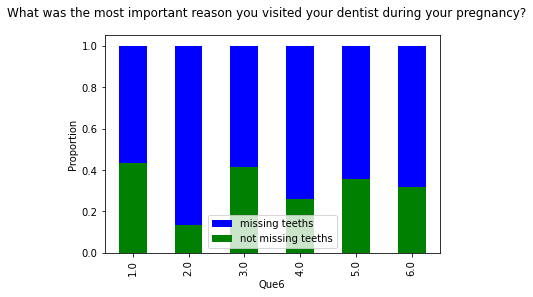

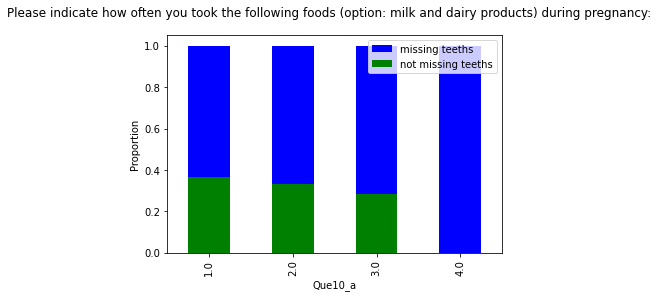

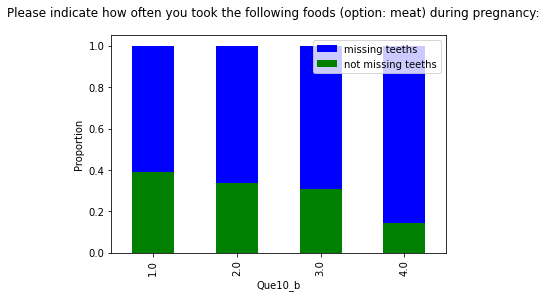

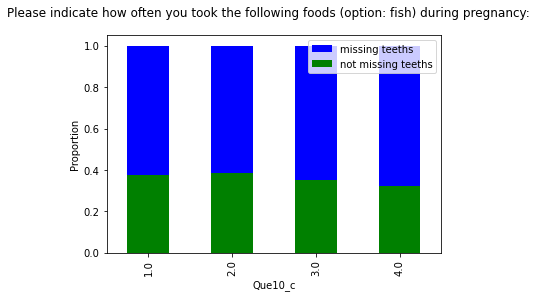

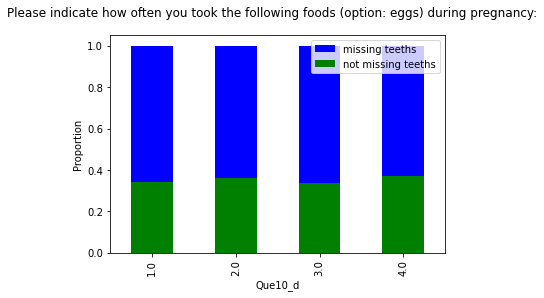

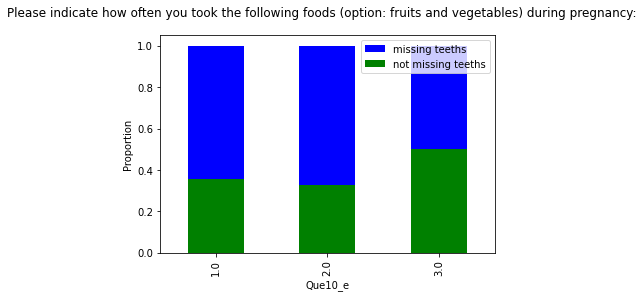

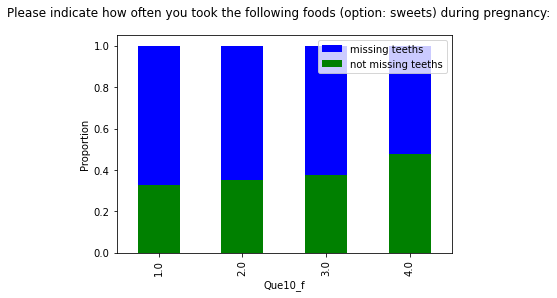

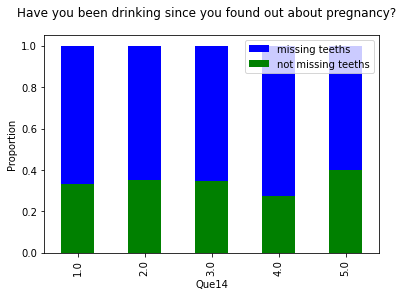

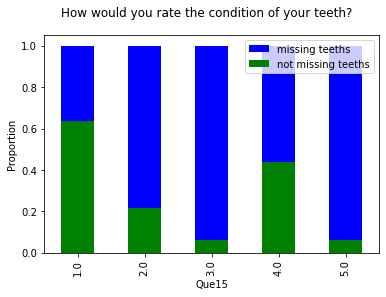

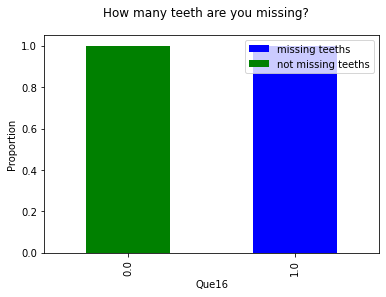

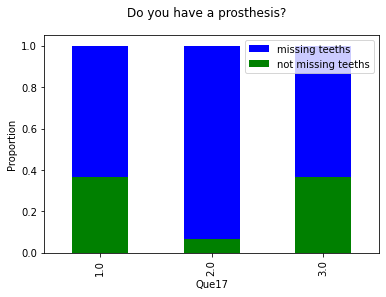

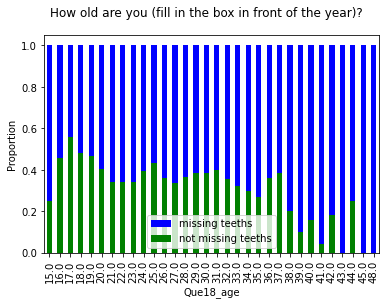

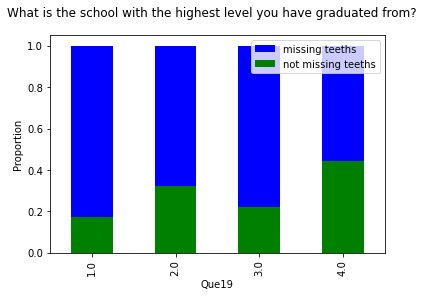

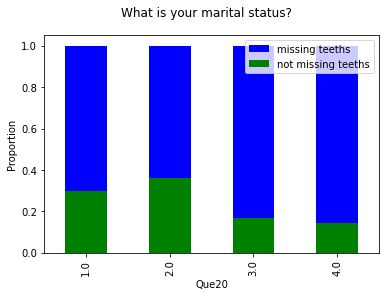

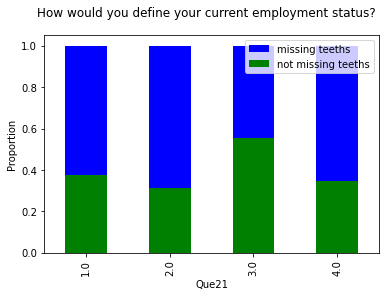

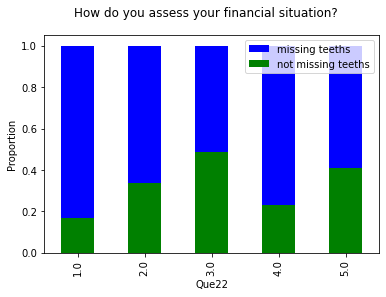

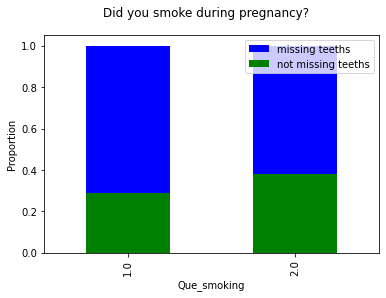

In [15]:
for col in data.columns:
    counts_df = data.groupby([col, "Que16"])[col].count().unstack()
    percents_df = counts_df.T.div(counts_df.T.sum()).T
    
    fig, ax = plt.subplots()

    percents_df.plot(kind="bar", stacked=True, color=["green", "blue"], ax=ax)

    ax.set_xlabel(col)
    ax.set_ylabel("Proportion")

    color_patches = [
        Patch(facecolor="blue", label="missing teeths"),
        Patch(facecolor="green", label="not missing teeths")
    ]
    ax.legend(handles=color_patches)
    
    title = questions_EN[col]['text'] 
    fig.suptitle(title);
    fig.savefig(FIG_DIR+col+'_proportion_ratio.png', dpi=fig.dpi)

Plotting boxplot for two classes (missing and not missing teeths) for each question to see possible outliers and data distribution.

/home/miroslav/anaconda3/envs/master-env/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


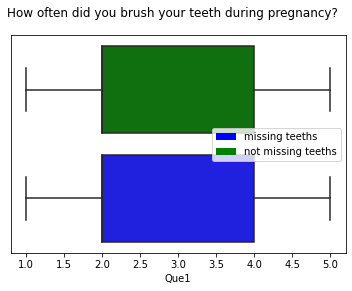

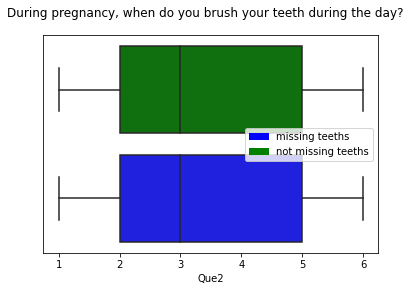

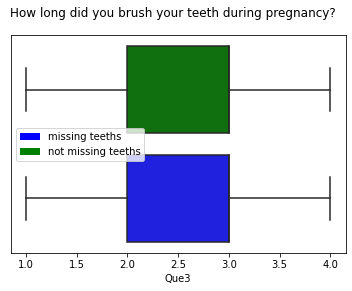

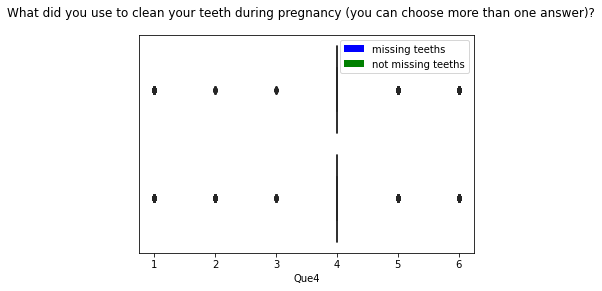

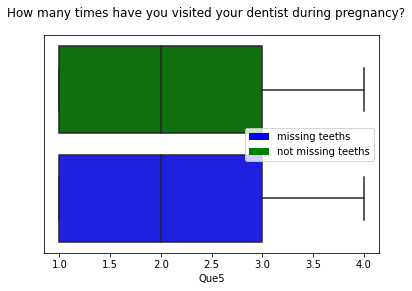

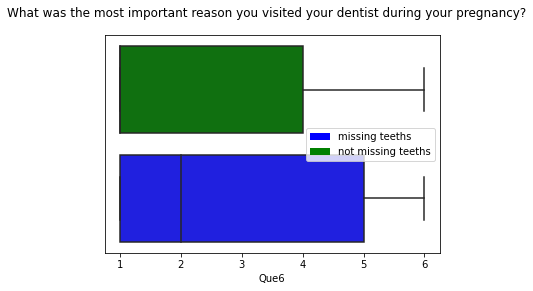

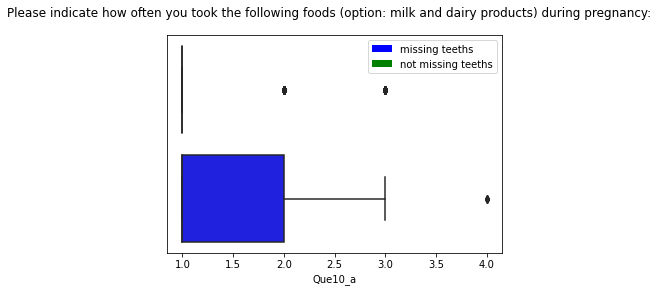

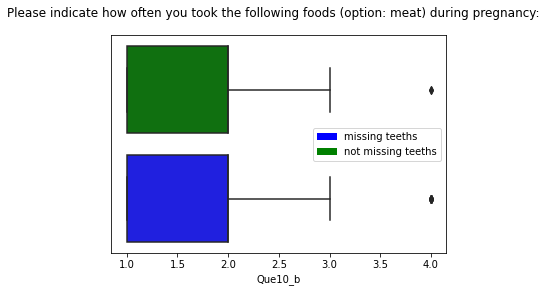

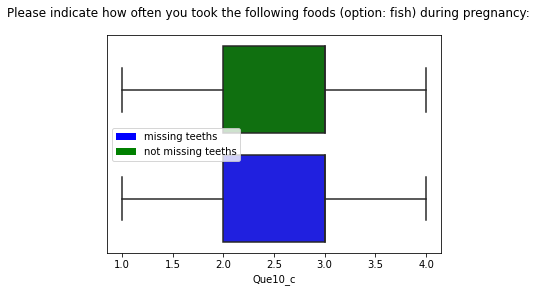

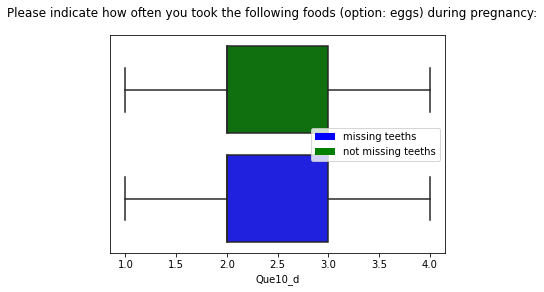

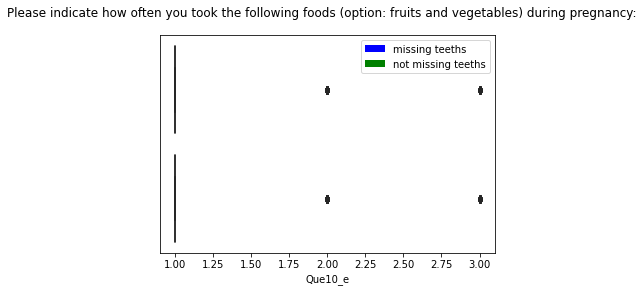

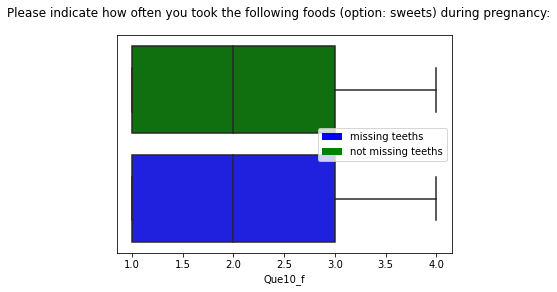

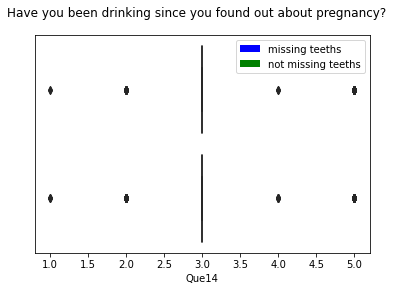

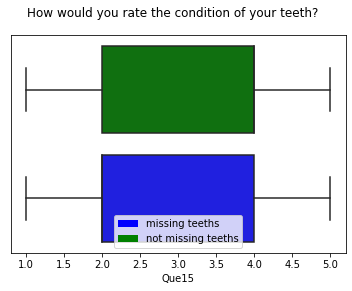

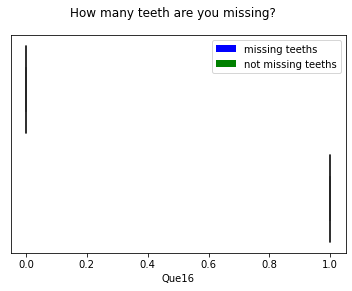

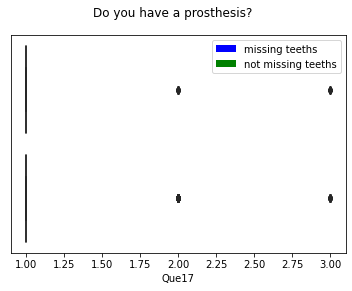

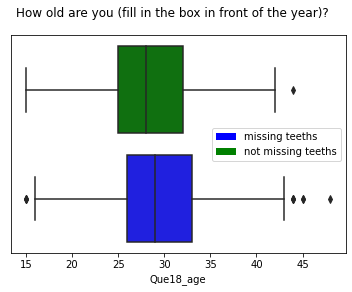

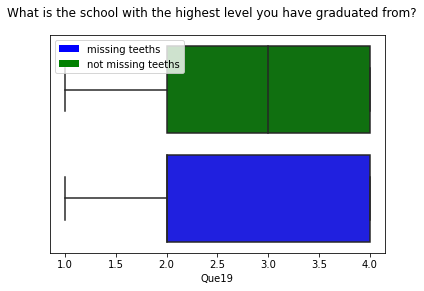

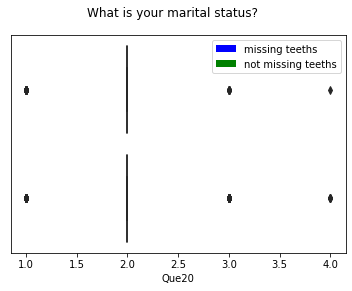

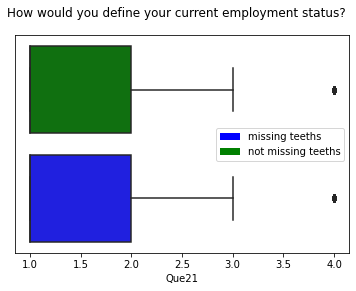

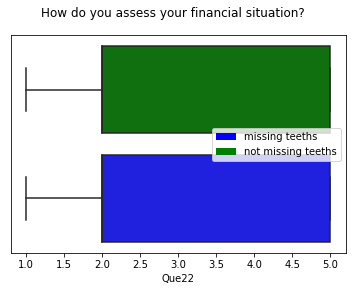

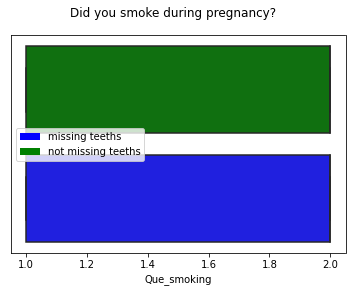

In [16]:
for col in data.columns:
    fig, ax = plt.subplots()

    sns.boxplot(x=col, y="Que16", data=data, orient="h", palette={1:"blue", 0:"green"}, ax=ax)

    ax.get_yaxis().set_visible(False)
    
    title = questions_EN[col]['text'] 
    fig.suptitle(title)

    color_patches = [
        Patch(facecolor="blue", label="missing teeths"),
        Patch(facecolor="green", label="not missing teeths")
        ]
    ax.legend(handles=color_patches)
    fig.savefig(FIG_DIR+col+'_boxplot.png', dpi=fig.dpi)

## Plotting - whole data mapped in classes

In [17]:
data = out_data.copy()
data = perform_mapping(data, questions_map_EN)

Plotting differences in occurrences for two classes (missing and not missing teeths) for each question.

/home/miroslav/anaconda3/envs/master-env/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


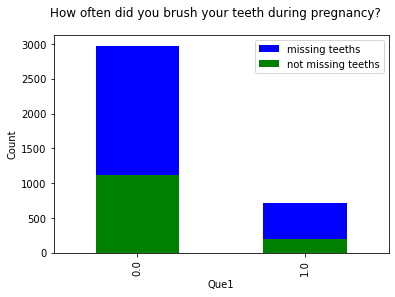

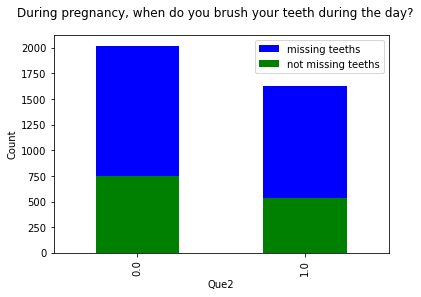

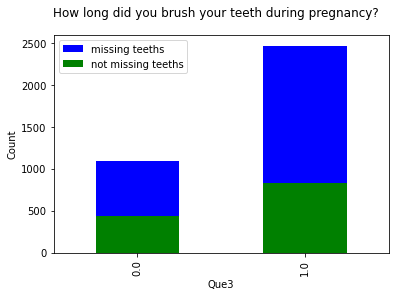

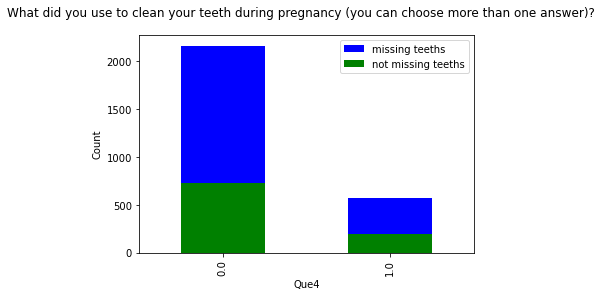

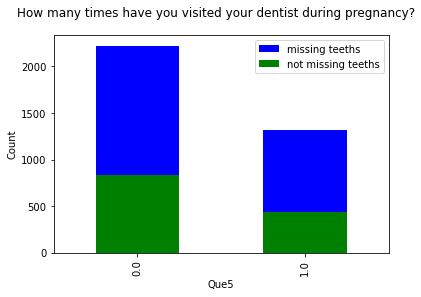

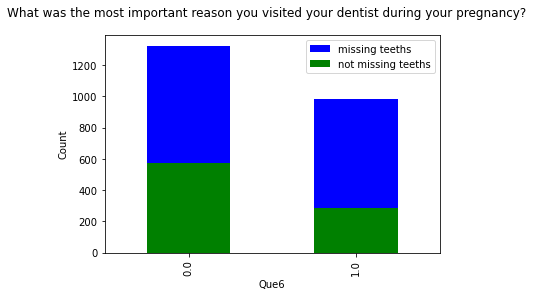

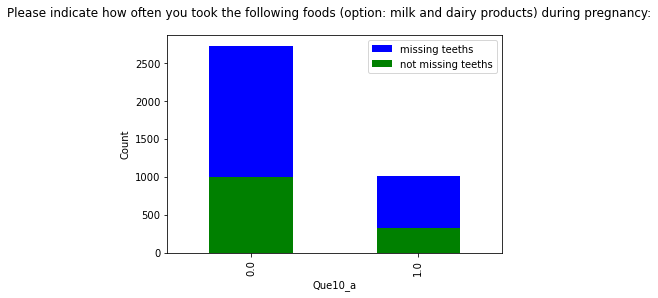

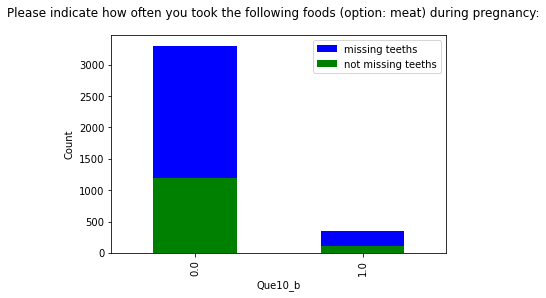

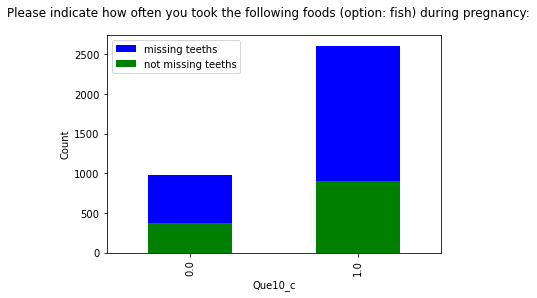

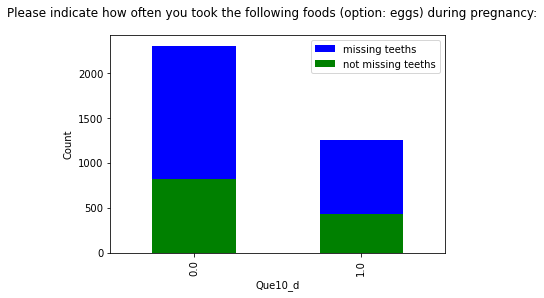

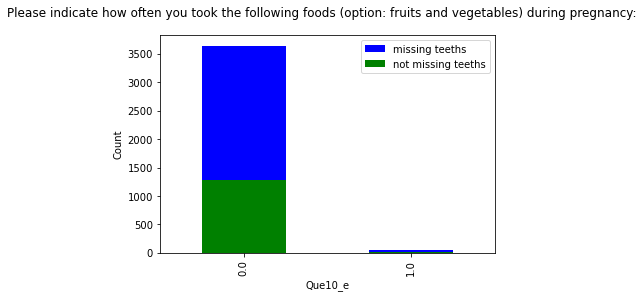

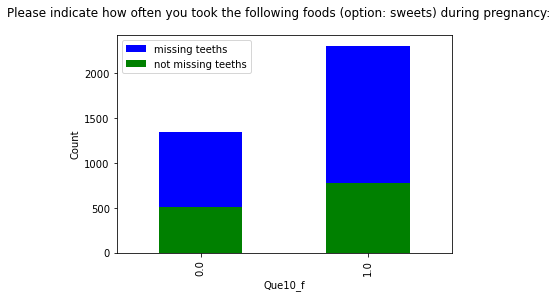

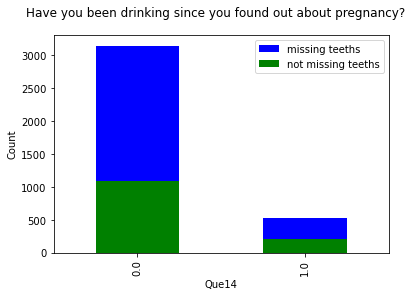

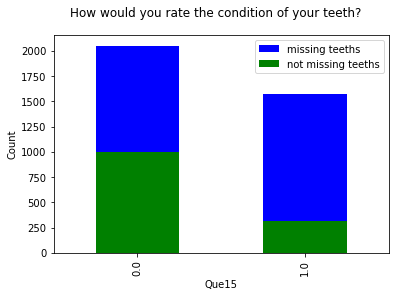

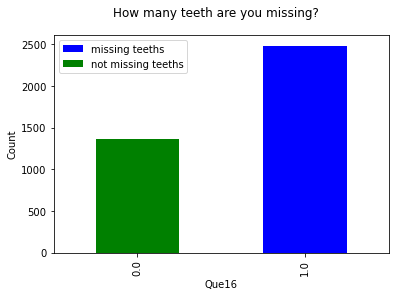

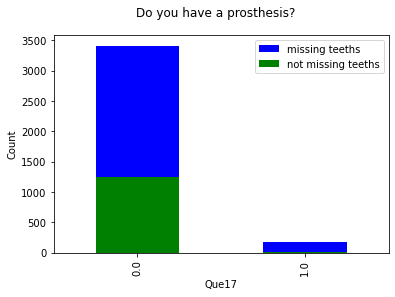

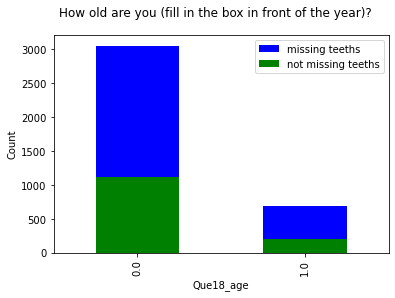

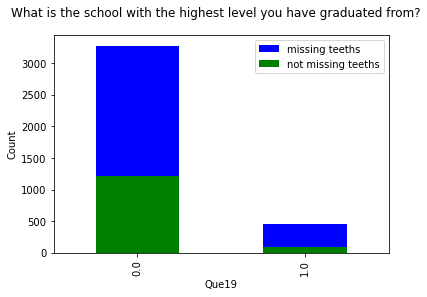

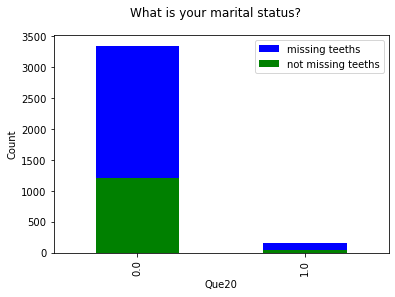

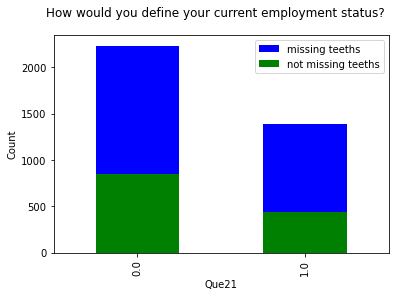

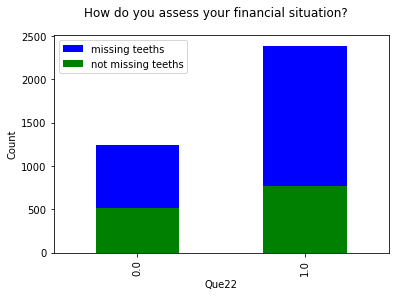

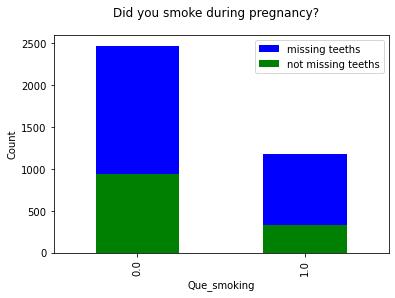

In [18]:
for col in data.columns:
    counts_df = data.groupby([col, "Que16"])[col].count().unstack()
    fig, ax = plt.subplots()

    counts_df.plot(kind="bar", stacked=True, color=["green", "blue"], ax=ax)
    ax.set_xlabel(col)
    ax.set_ylabel("Count")

    color_patches = [
        Patch(facecolor="blue", label="missing teeths"),
        Patch(facecolor="green", label="not missing teeths")
    ]
    ax.legend(handles=color_patches)
    
    title = questions_EN[col]['text'] 
    fig.suptitle(title);
    fig.savefig(FIG_DIR+col+'map_countplot.png', dpi=fig.dpi)

Plotting countplot for two classes (missing and not missing teeths) for each question to see proportion ratio of classes.

/home/miroslav/anaconda3/envs/master-env/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


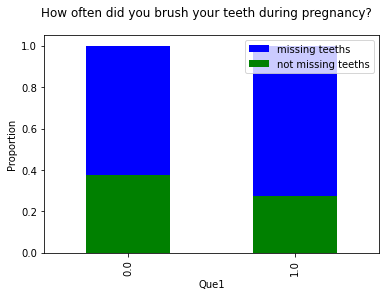

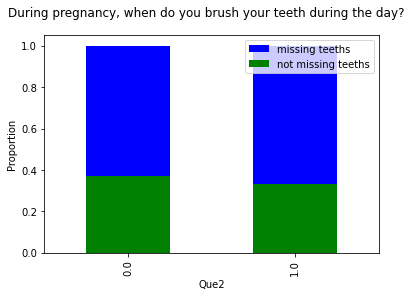

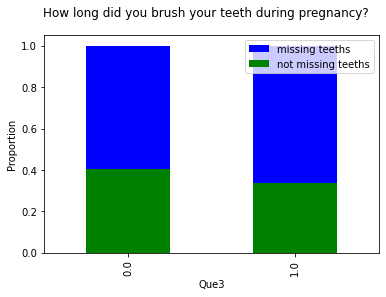

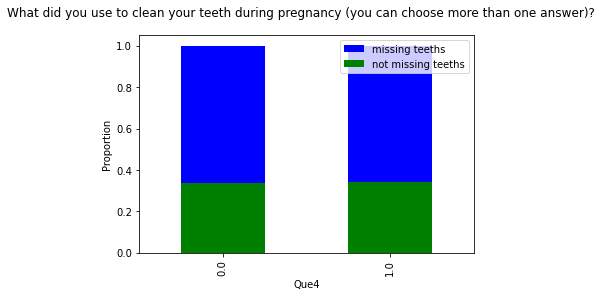

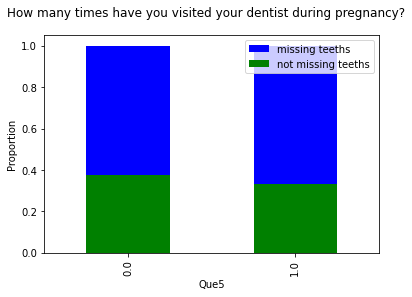

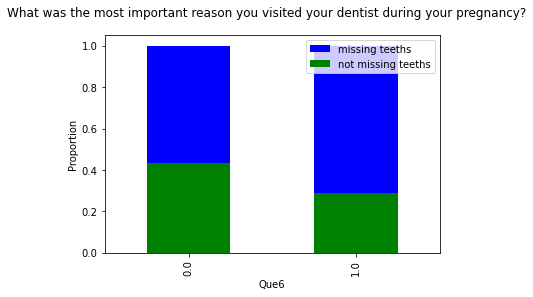

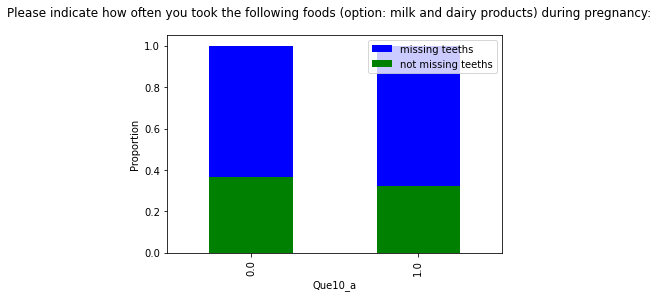

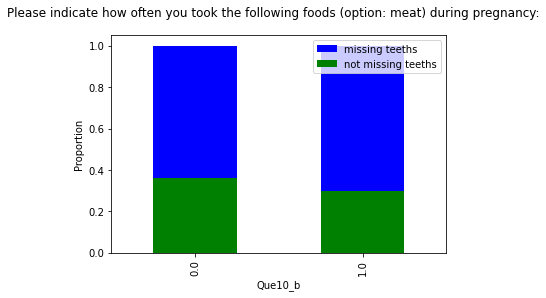

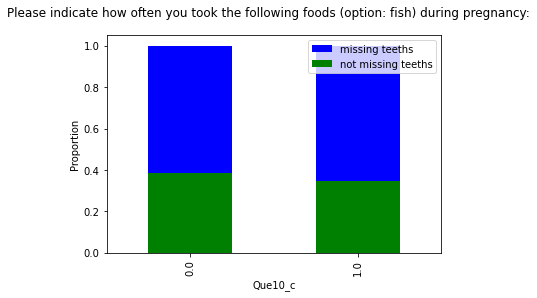

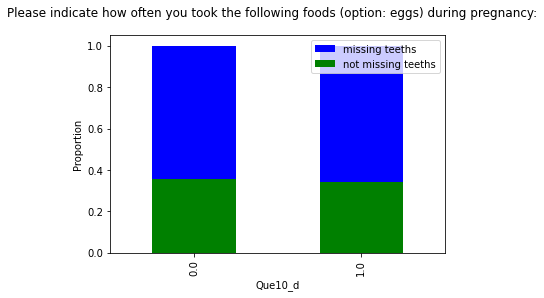

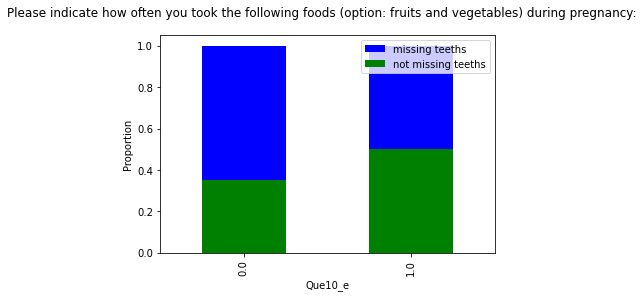

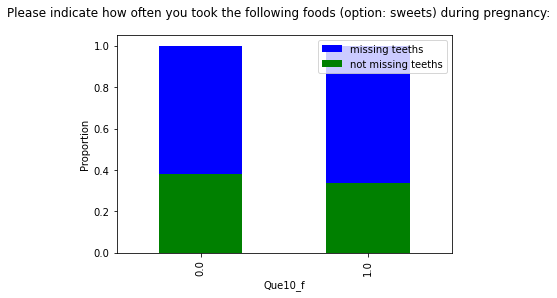

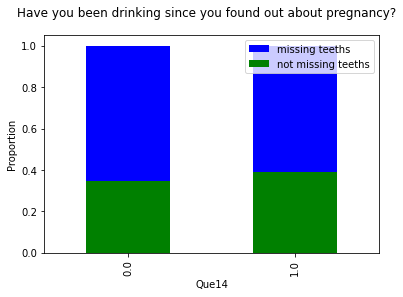

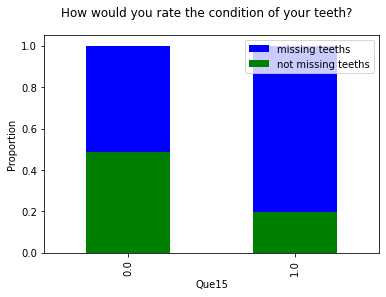

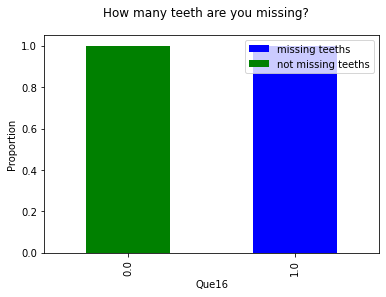

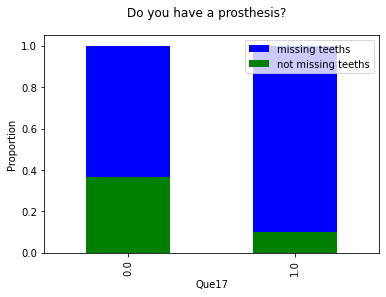

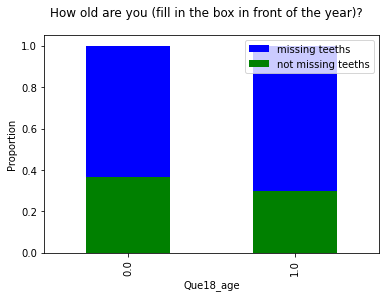

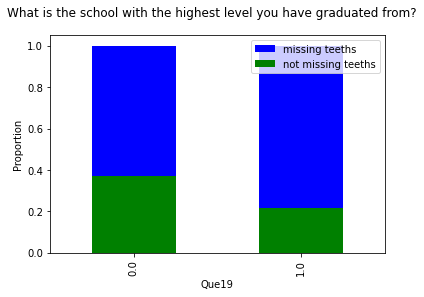

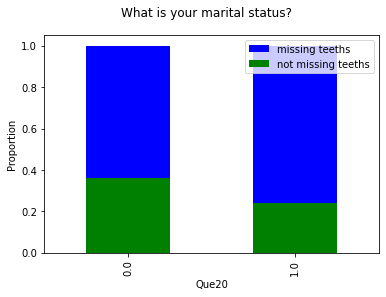

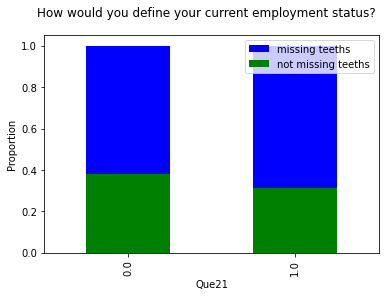

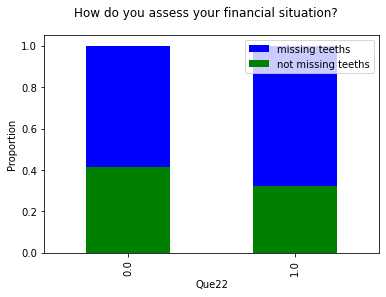

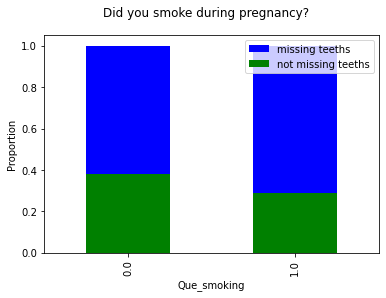

In [19]:
for col in data.columns:
    counts_df = data.groupby([col, "Que16"])[col].count().unstack()
    percents_df = counts_df.T.div(counts_df.T.sum()).T
    
    fig, ax = plt.subplots()

    percents_df.plot(kind="bar", stacked=True, color=["green", "blue"], ax=ax)

    ax.set_xlabel(col)
    ax.set_ylabel("Proportion")

    color_patches = [
        Patch(facecolor="blue", label="missing teeths"),
        Patch(facecolor="green", label="not missing teeths")
    ]
    ax.legend(handles=color_patches)
    
    title = questions_EN[col]['text'] 
    fig.suptitle(title);
    fig.savefig(FIG_DIR+col+'map_proportion_ratio.png', dpi=fig.dpi)